In [2]:






import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

C:\Users\HP\AppData\Local\Temp\ipykernel_9416\224758595.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
dt=pd.read_csv('heart_cleveland_upload.csv')
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [4]:
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
dt = dt.copy()

In [6]:
dt= dt.rename(columns={'condition':'target'})
print(dt.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  target  
0   1     0       0  
1   2     0       0  
2   0     0       0  
3   1     0       1  
4   0     0       0  


In [7]:
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

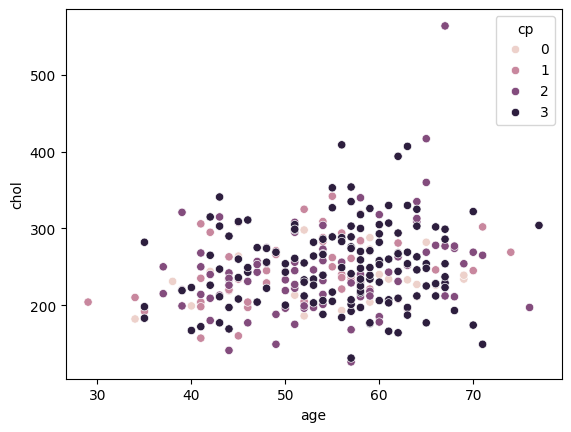

In [8]:
sns.scatterplot(x='age', y='chol',data=dt,hue='cp')
plt.show()

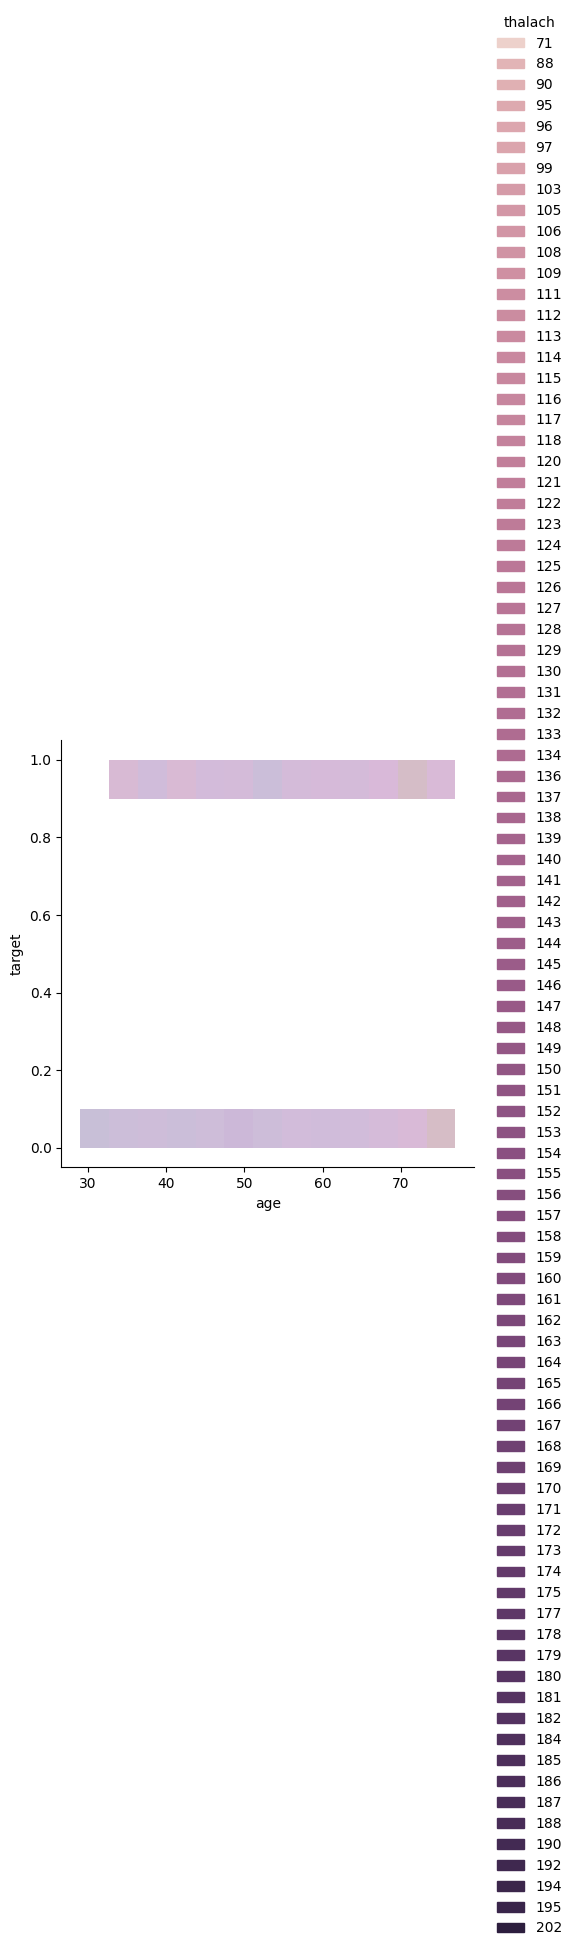

In [9]:
sns.displot(x='age',y='target', data=dt,hue='thalach')
plt.show()

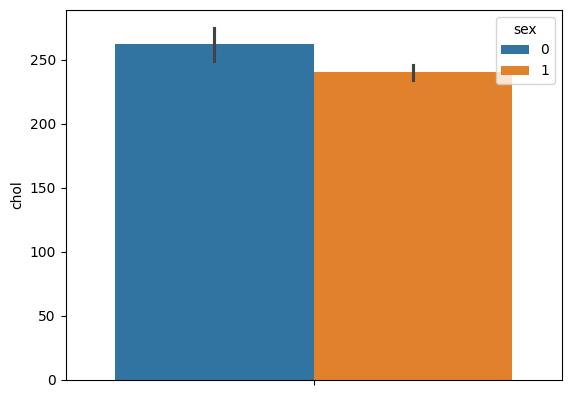

In [10]:
sns.barplot(y='chol',data=dt, hue='sex')
plt.show()

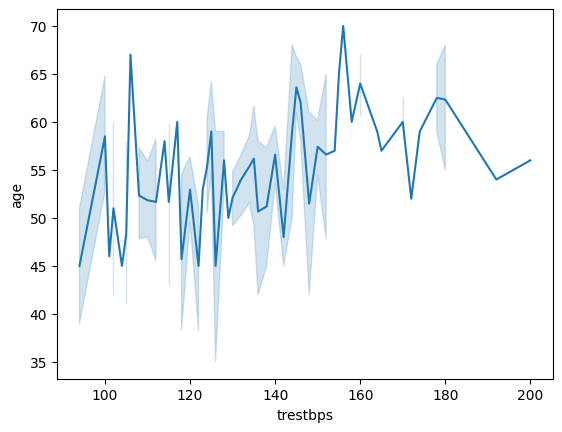

In [11]:
sns.lineplot(y='age',x='trestbps' ,data=dt)
plt.show()

In [12]:
cr=dt.corr()
cr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


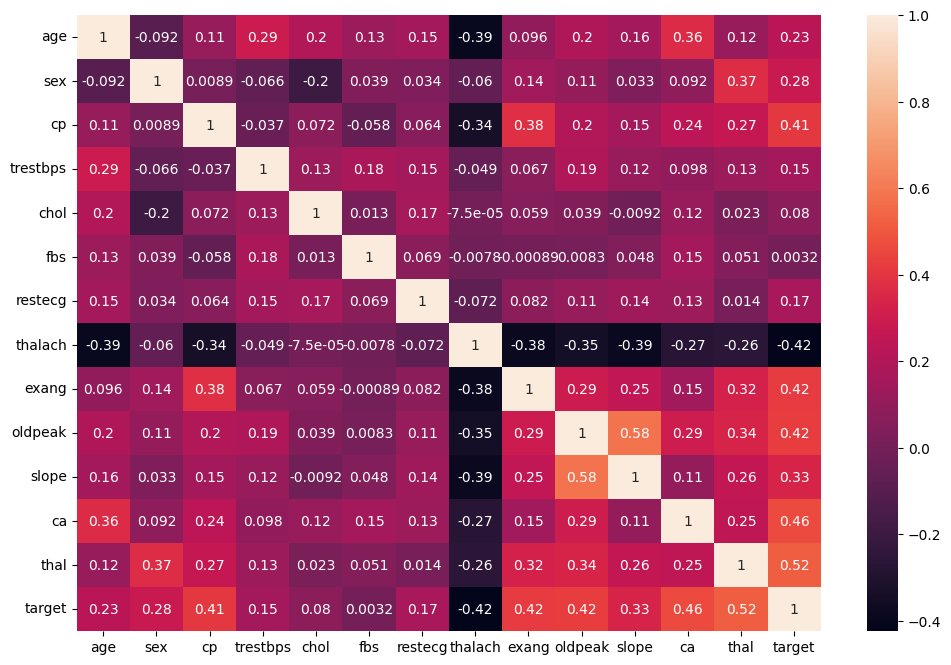

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(cr,xticklabels=dt.columns,yticklabels=dt.columns,annot=True)
plt.show()

<Figure size 1200x800 with 0 Axes>

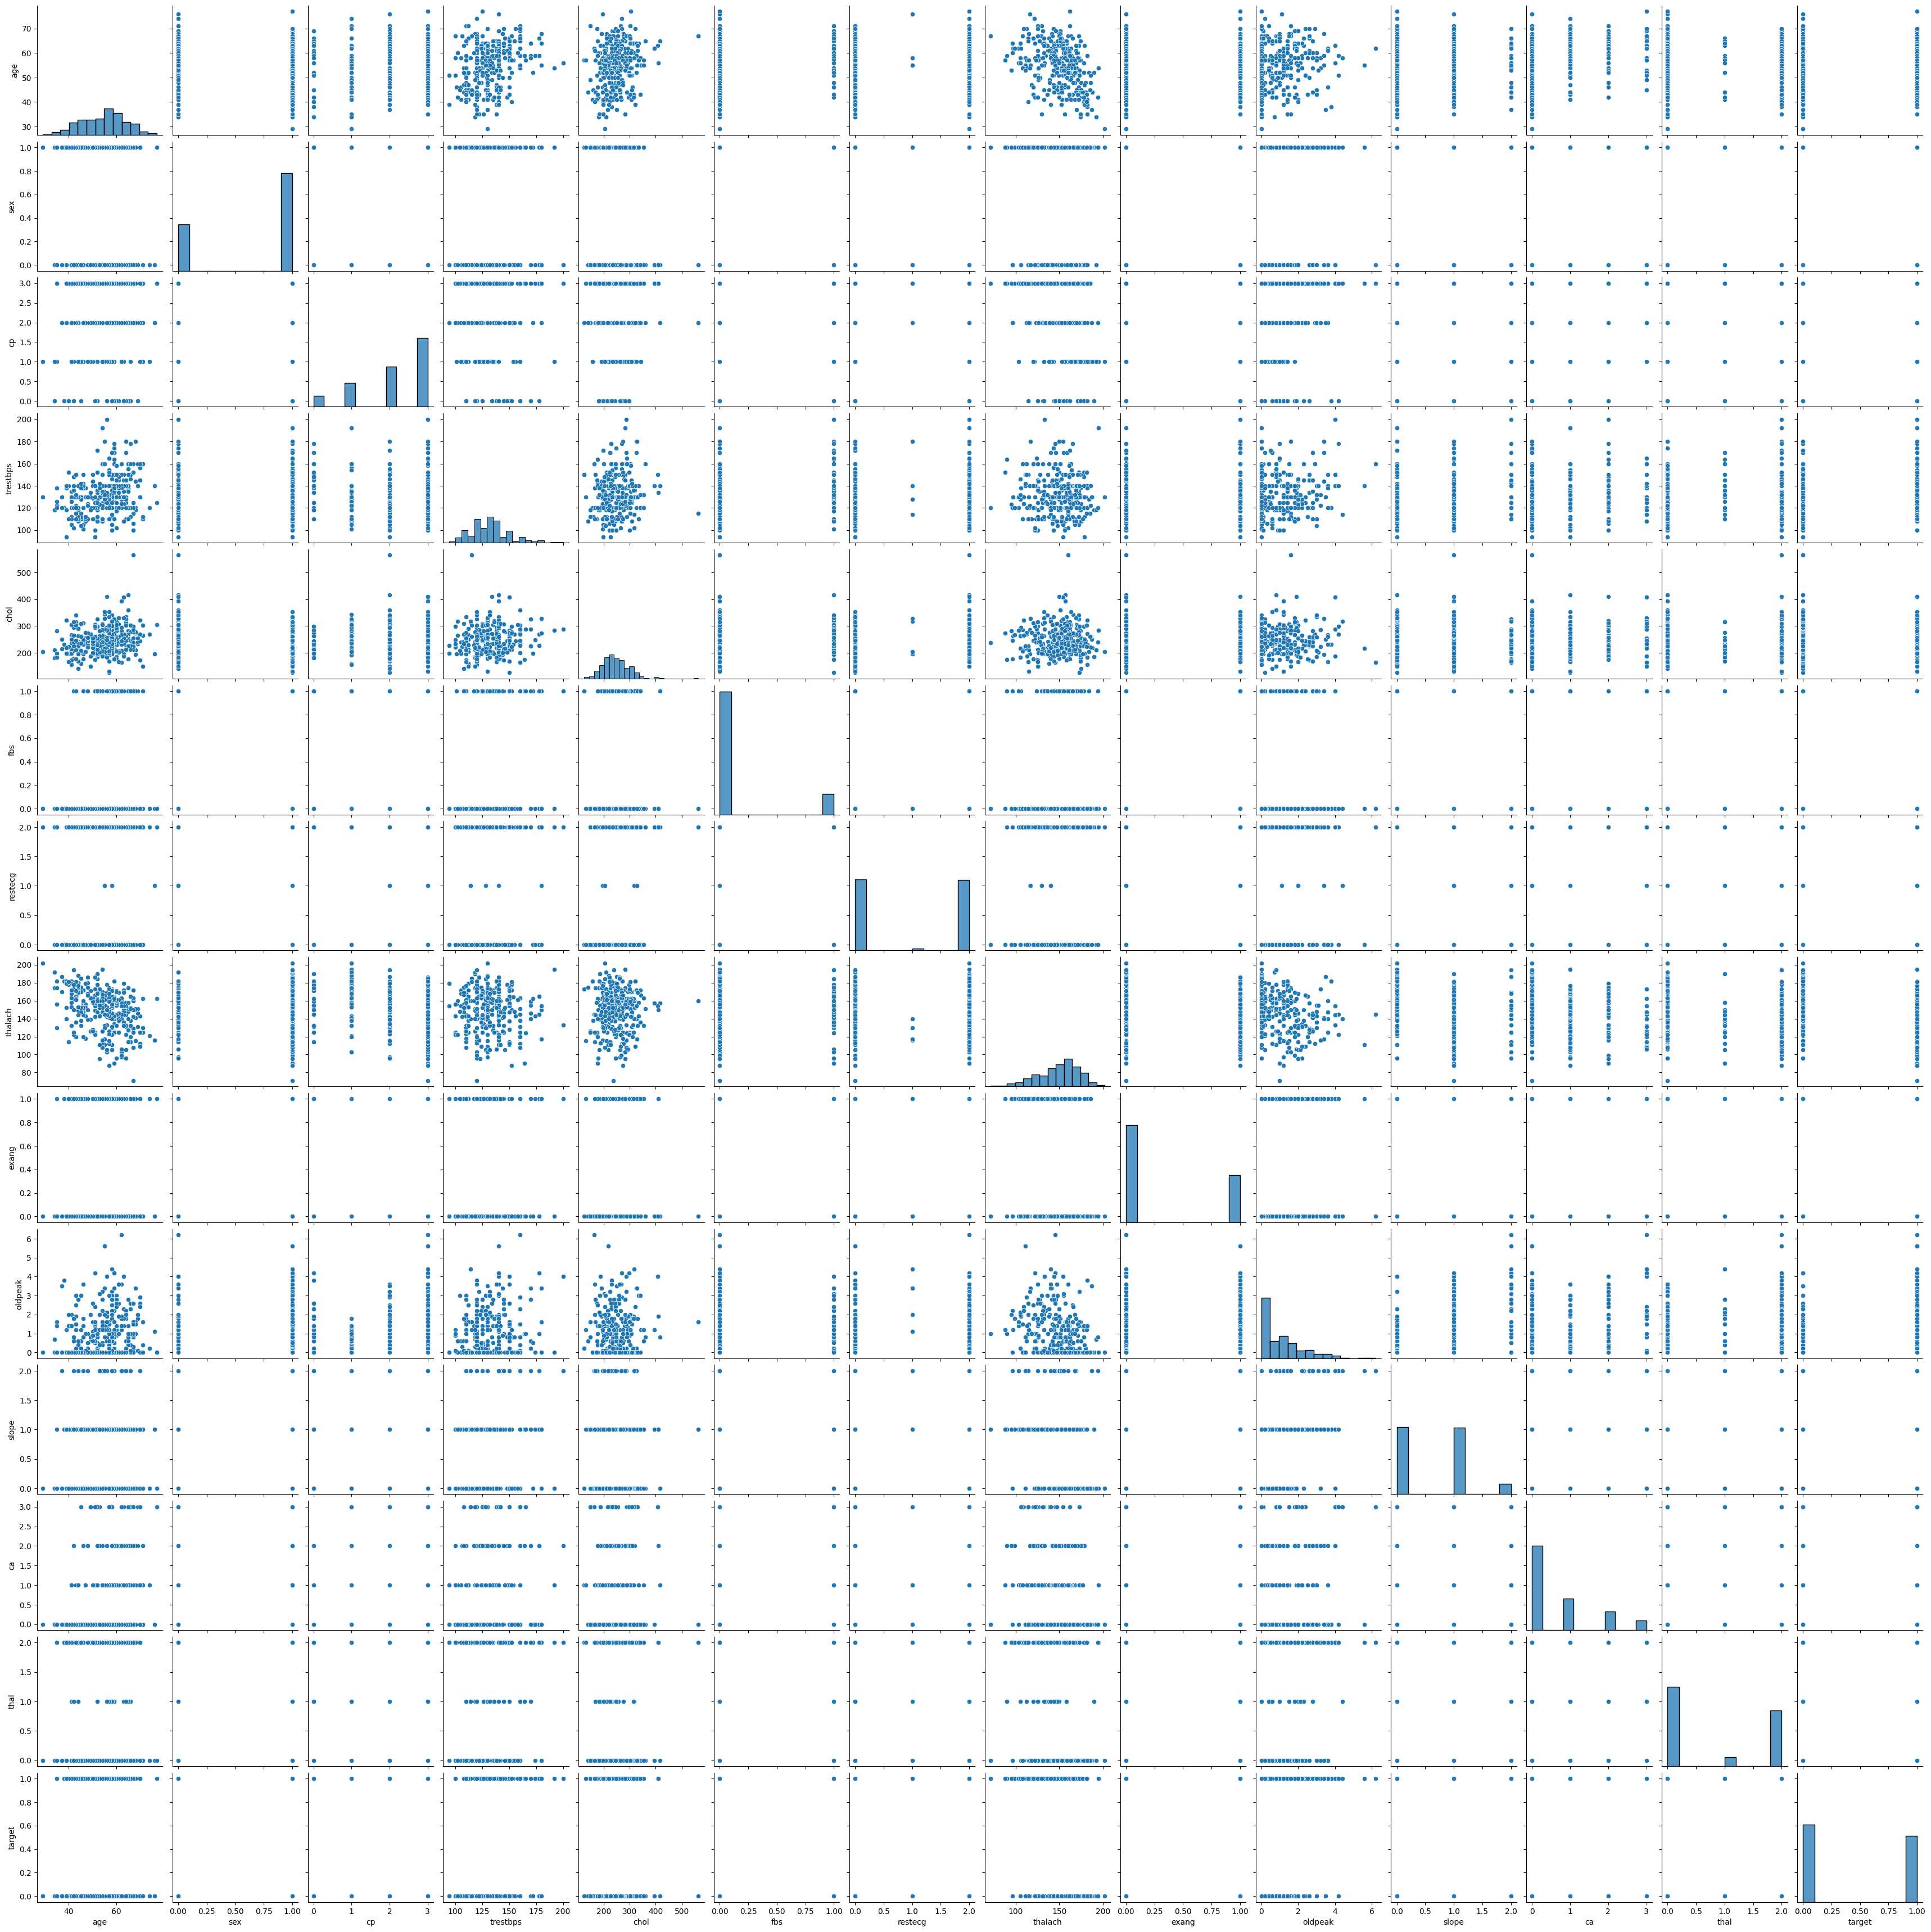

In [14]:
plt.figure(figsize=(12,8))
sns.pairplot(dt)
plt.show()

In [15]:
x=dt.drop(columns= 'target')
y= dt.target

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [17]:
dt.shape

(297, 14)

In [18]:
xtrain.shape

(207, 13)

In [19]:
ytrain.shape

(207,)

In [20]:
xtest.shape

(90, 13)

In [21]:
ytest.shape

(90,)

In [22]:
lr=LogisticRegression(solver='lbfgs', max_iter=1000)

In [23]:
lr.fit(xtest,ytest)

LogisticRegression(max_iter=1000)

In [24]:
lr.score(xtest,ytest)

0.9444444444444444

In [25]:
lr.score(xtrain,ytrain)

0.8067632850241546

In [26]:
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(xtrain)
x_test_scaler= scaler.fit_transform(xtest)


In [27]:
clf = DecisionTreeClassifier()

In [28]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [29]:
ypred = clf.predict(xtest)

In [30]:
accuracy = accuracy_score(ytest, ypred)

In [31]:
print(accuracy)

0.7333333333333333


In [32]:
cm = confusion_matrix(ytest, ypred)
print(cm)


[[38 11]
 [13 28]]


In [33]:
model=RandomForestClassifier(n_estimators=20)
model.fit(x_train_scaler, ytrain)
y_pred= model.predict(x_test_scaler)
p = model.score(x_test_scaler,ytest)
print(p)

0.8111111111111111


In [34]:
print('Classification Report\n', classification_report(ytest, ypred))
print('Accuracy: {}%\n'.format(round((accuracy_score(ytest, ypred)*100),2)))


Classification Report
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        49
           1       0.72      0.68      0.70        41

    accuracy                           0.73        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.73      0.73      0.73        90

Accuracy: 73.33%



In [36]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(xtrain,ytrain)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=0)

In [38]:
predictions = ada.predict(xtest)

In [40]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        49
           1       0.73      0.78      0.75        41

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.77      0.77      0.77        90



In [ ]:
filename = 'heart-disease-prediction.pkl'
pickle.dump(model, open(filename, 'wb'))